In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, binomtest

# Load dataset
heart = pd.read_csv("heart_disease.csv")

# Split dataset by heart disease status
yes_hd = heart[heart.heart_disease == "presence"]
no_hd = heart[heart.heart_disease == "absence"]


# Heart Disease Analysis
## Applied Data Science with Python – Codecademy Bootcamp

This project investigates clinical and demographic factors associated with heart disease using data from the Cleveland Clinic Foundation.


## Part I – Cholesterol & Fasting Blood Sugar


In [15]:
# Cholesterol analysis (heart disease patients)
chol_hd = yes_hd['chol']
mean_chol_hd = np.mean(chol_hd)
print(mean_chol_hd)

t_stat, p_two_sided = ttest_1samp(chol_hd, 240)
p_one_sided = p_two_sided / 2
print(p_one_sided)

if p_one_sided < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Cholesterol analysis (no heart disease)
chol_no_hd = no_hd['chol']
mean_chol_no_hd = np.mean(chol_no_hd)
print(mean_chol_no_hd)

t_stat_no, p_two_sided_no = ttest_1samp(chol_no_hd, 240)
p_one_sided_no = p_two_sided_no / 2
print(p_one_sided_no)

# Fasting blood sugar analysis
num_patients = int(len(heart))
print(num_patients)

num_highfbs_patients = int((heart['fbs'] == 1).sum())
print(num_highfbs_patients)

expected_diabetes = num_patients * 0.08
print(expected_diabetes)

result = binomtest(
    num_highfbs_patients,
    num_patients,
    p=0.08,
    alternative='greater'
)

pval = result.pvalue
print(pval)

if pval < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

251.4748201438849
0.0035411033905155707
Reject the null hypothesis
242.640243902439
0.26397120232220506
303
45
24.240000000000002
4.689471951448875e-05
Reject the null hypothesis


### Part I Summary
- Heart disease patients show significantly elevated cholesterol levels.
- Patients without heart disease do not show significantly high cholesterol.
- The prevalence of high fasting blood sugar in this dataset is significantly higher than expected based on population estimates.


## Final Visualizations


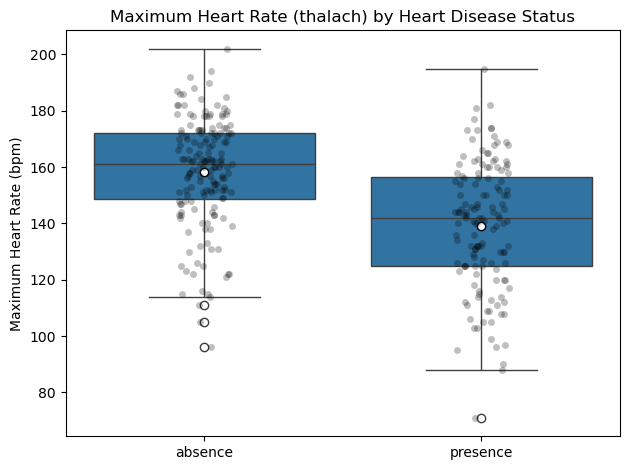

In [16]:
plt.clf()

sns.boxplot(
    x="heart_disease",
    y="thalach",
    data=heart,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"}
)

sns.stripplot(
    x="heart_disease",
    y="thalach",
    data=heart,
    alpha=0.25,
    color="black"
)

plt.title("Maximum Heart Rate (thalach) by Heart Disease Status")
plt.xlabel("")
plt.ylabel("Maximum Heart Rate (bpm)")

plt.tight_layout()
plt.show()


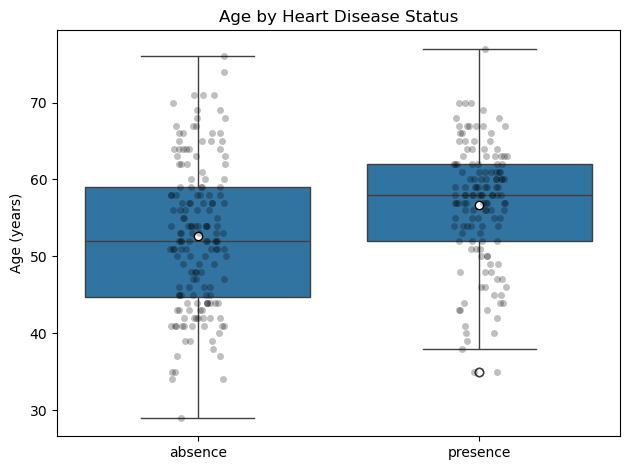

In [17]:
plt.clf()

sns.boxplot(
    x="heart_disease",
    y="age",
    data=heart,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"}
)

sns.stripplot(
    x="heart_disease",
    y="age",
    data=heart,
    alpha=0.25,
    color="black"
)

plt.title("Age by Heart Disease Status")
plt.xlabel("")
plt.ylabel("Age (years)")

plt.tight_layout()
plt.show()


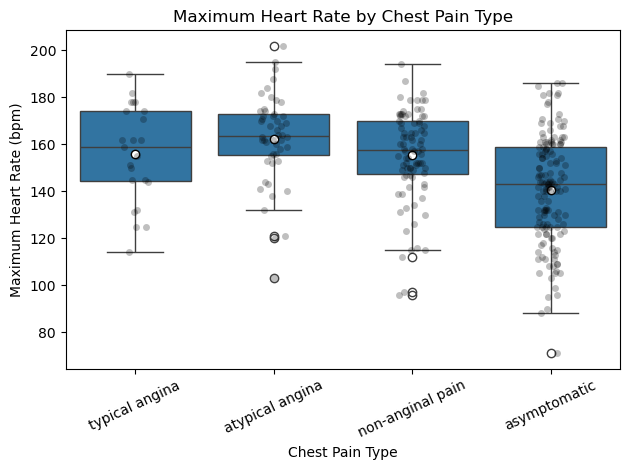

In [18]:
plt.clf()

order = [
    "typical angina",
    "atypical angina",
    "non-anginal pain",
    "asymptomatic"
]

sns.boxplot(
    x="cp",
    y="thalach",
    data=heart,
    order=order,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"}
)

sns.stripplot(
    x="cp",
    y="thalach",
    data=heart,
    order=order,
    alpha=0.25,
    color="black"
)

plt.title("Maximum Heart Rate by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Maximum Heart Rate (bpm)")
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

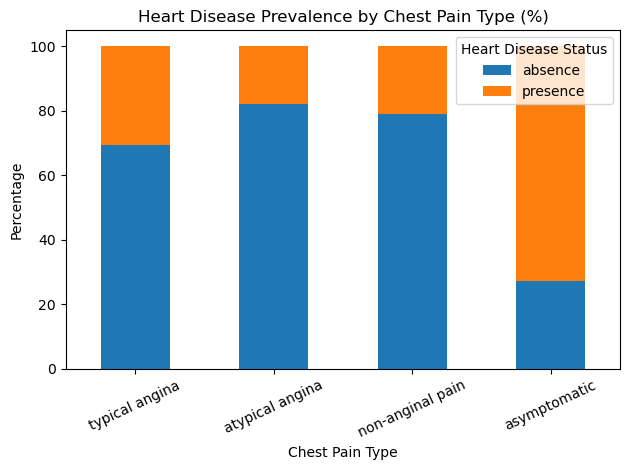

In [19]:
plt.clf()

# Create percentage contingency table
ct_cp_hd = pd.crosstab(
    heart["cp"],
    heart["heart_disease"],
    normalize="index"
) * 100

# Order rows for readability
ct_cp_hd = ct_cp_hd.loc[
    ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
]

ct_cp_hd.plot(kind="bar", stacked=True)

plt.title("Heart Disease Prevalence by Chest Pain Type (%)")
plt.ylabel("Percentage")
plt.xlabel("Chest Pain Type")
plt.xticks(rotation=25)
plt.legend(title="Heart Disease Status")

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

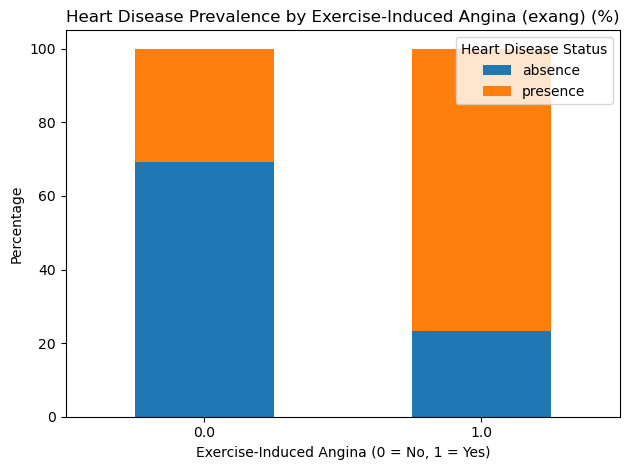

In [20]:
plt.clf()

# Create percentage contingency table
ct_exang_hd = pd.crosstab(
    heart["exang"],
    heart["heart_disease"],
    normalize="index"
) * 100

ct_exang_hd.plot(kind="bar", stacked=True)

plt.title("Heart Disease Prevalence by Exercise-Induced Angina (exang) (%)")
plt.ylabel("Percentage")
plt.xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
plt.xticks(rotation=0)
plt.legend(title="Heart Disease Status")

plt.tight_layout()
plt.show()


## Final Conclusions

- Patients diagnosed with heart disease tend to have significantly lower maximum heart rates during exercise, suggesting reduced cardiovascular performance.
- Age is significantly associated with heart disease, with affected patients generally being older.
- Chest pain type is strongly linked to heart disease outcomes, with asymptomatic patients showing the highest prevalence of heart disease.
- Exercise-induced angina is a strong indicator of heart disease risk, with a much higher prevalence observed among affected patients.
- Metabolic risk factors such as elevated cholesterol and high fasting blood sugar are significantly more common in patients with heart disease.

Overall, this analysis highlights the importance of combining clinical symptoms, exercise test results, and metabolic indicators when assessing heart disease risk.
